In [6]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


F	January
G	February
H	March
J	April
K	May
M	June
N	July
Q	August
U	September
V	October
X	November
Z	December

In [7]:
list_of_markets=get_market_list()

# Testing loading data from Arctic database

In [8]:
df=pd.DataFrame()
for m in list_of_markets:
    try:
        df[m]=get_timeseries(m)
    except:
        print m

RU
S


# Create lot sizing
12 month momentum per market returns with lot sizing

$$ \frac{signal}{\sigma * LotMultiplier * VolTarget} $$

In [34]:

data=df
signal_lookback=250
vol_lookback=20

mul=get_contract_multipliers()
vol=pd.ewmstd(data,vol_lookback,min_periods=vol_lookback)*math.sqrt(256)
signal=pd.rolling_mean(data,signal_lookback)
signal = signal /abs(signal)
position=(signal / (vol*mul) )

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=250,center=False).mean()


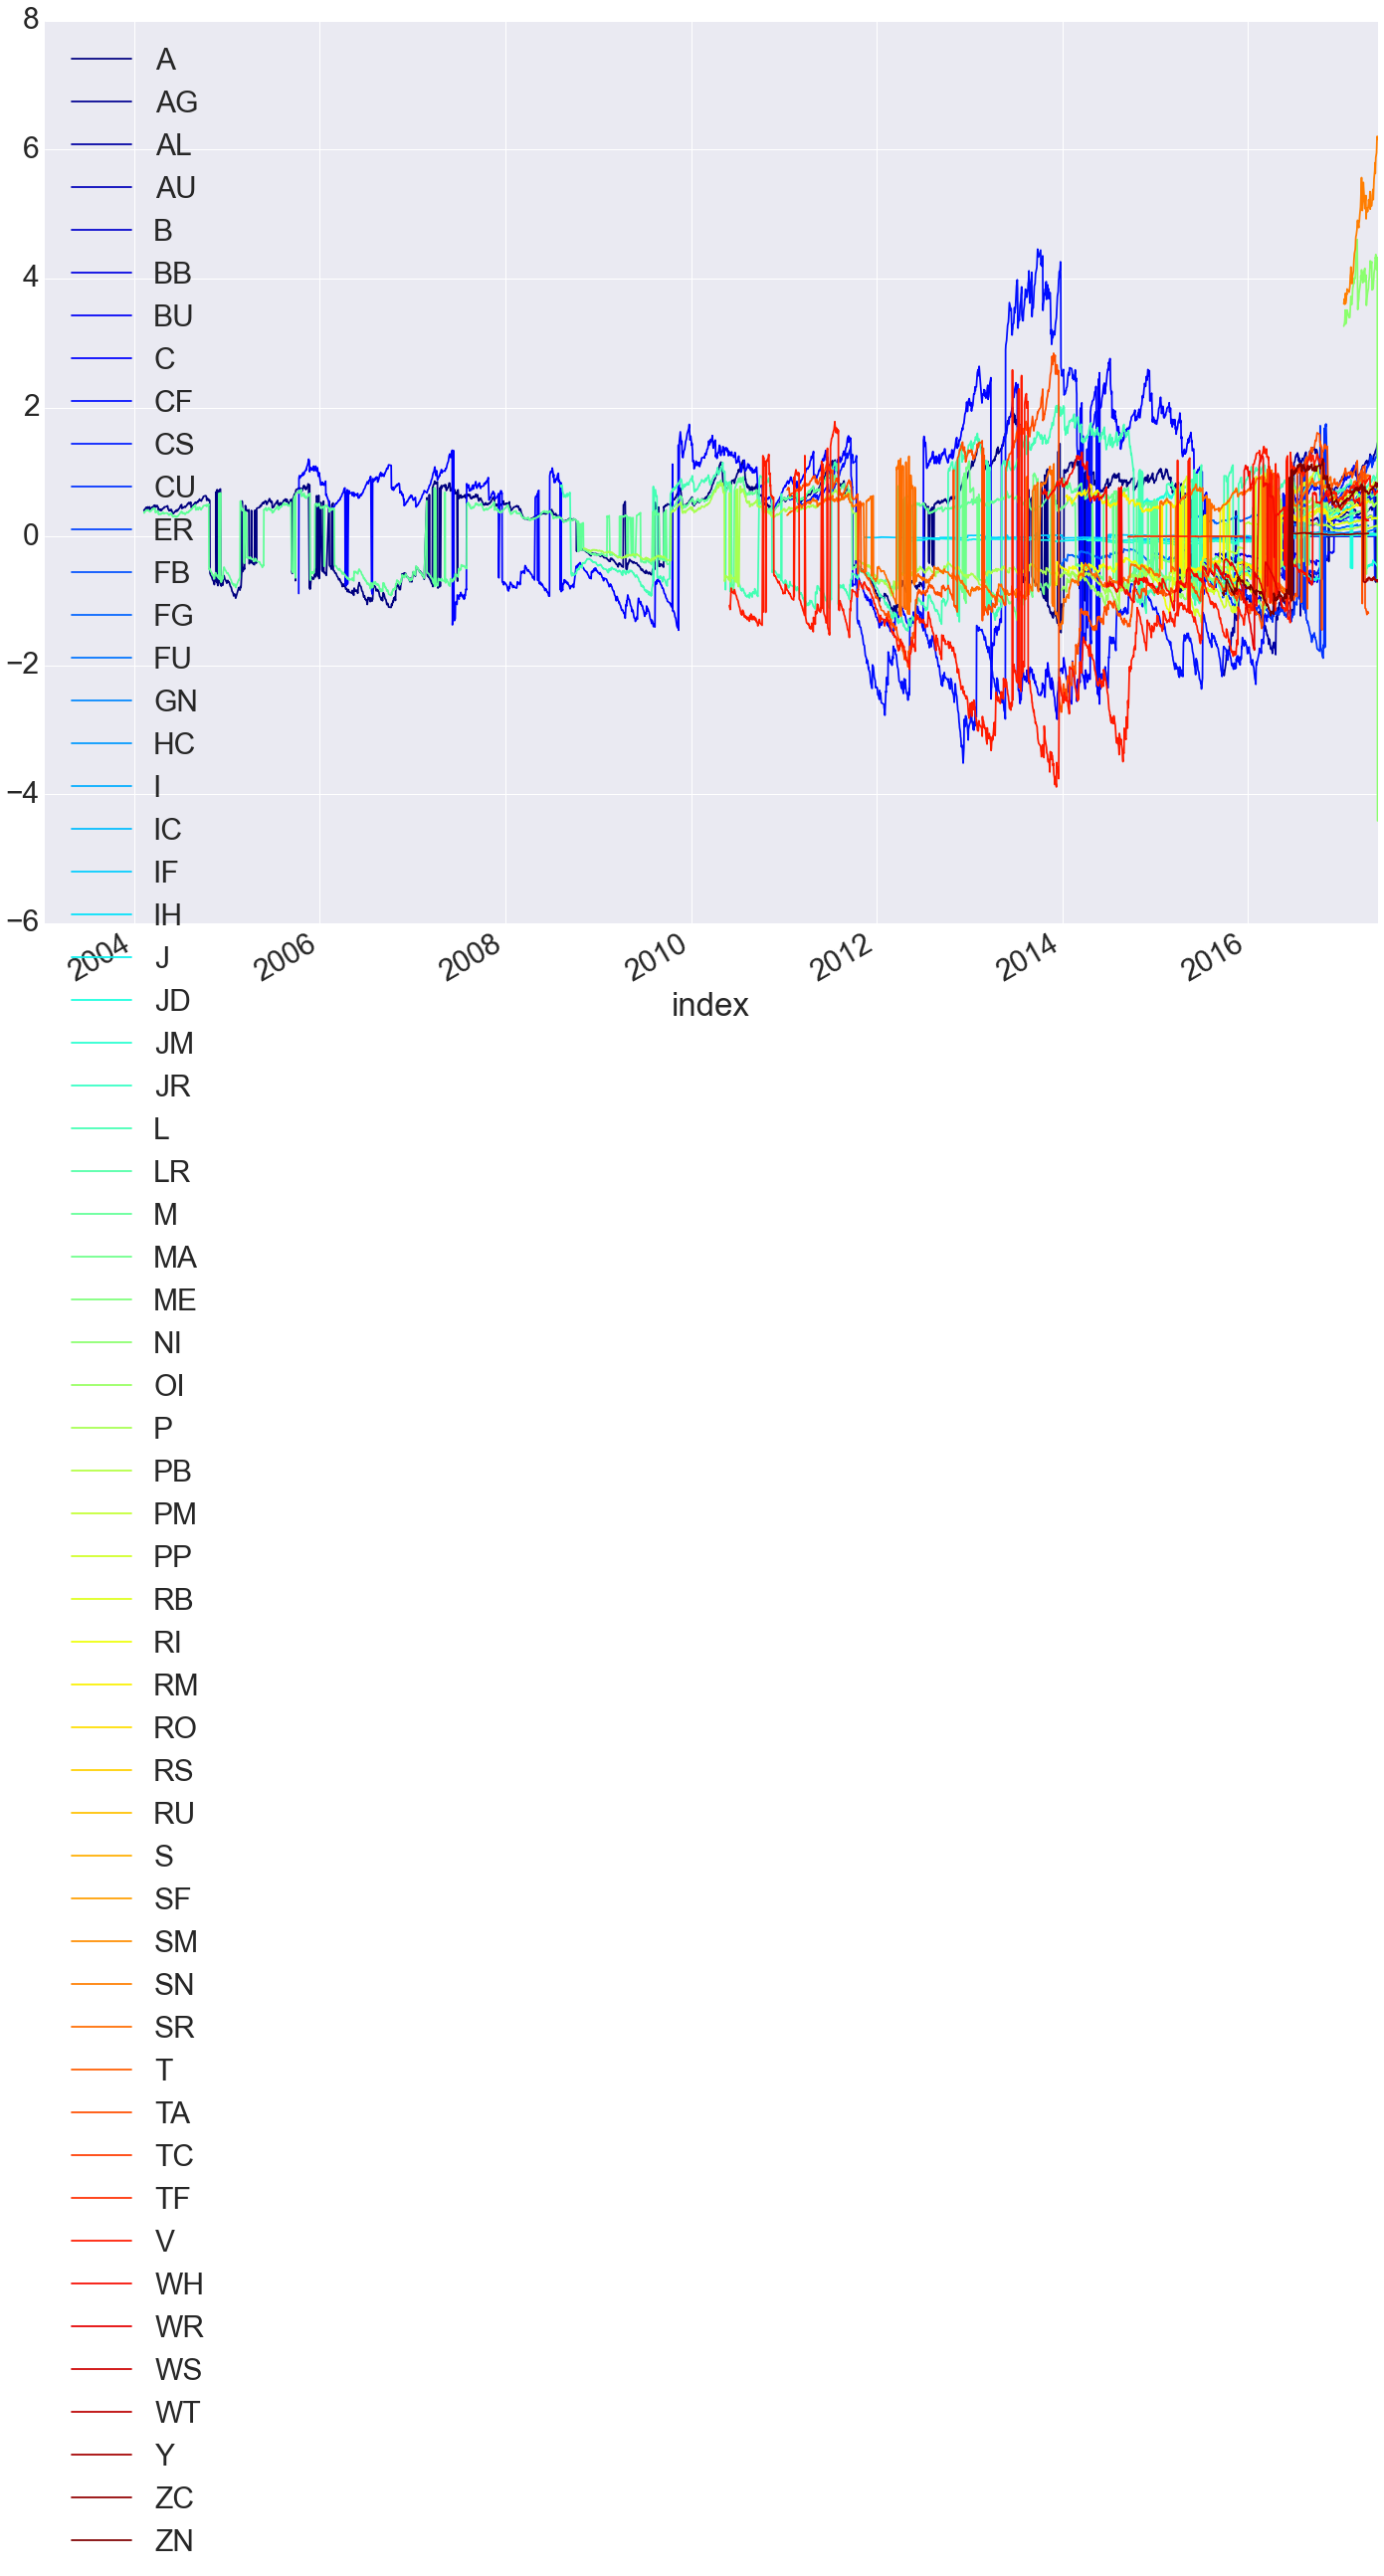

In [39]:
position.plot(colormap='jet')

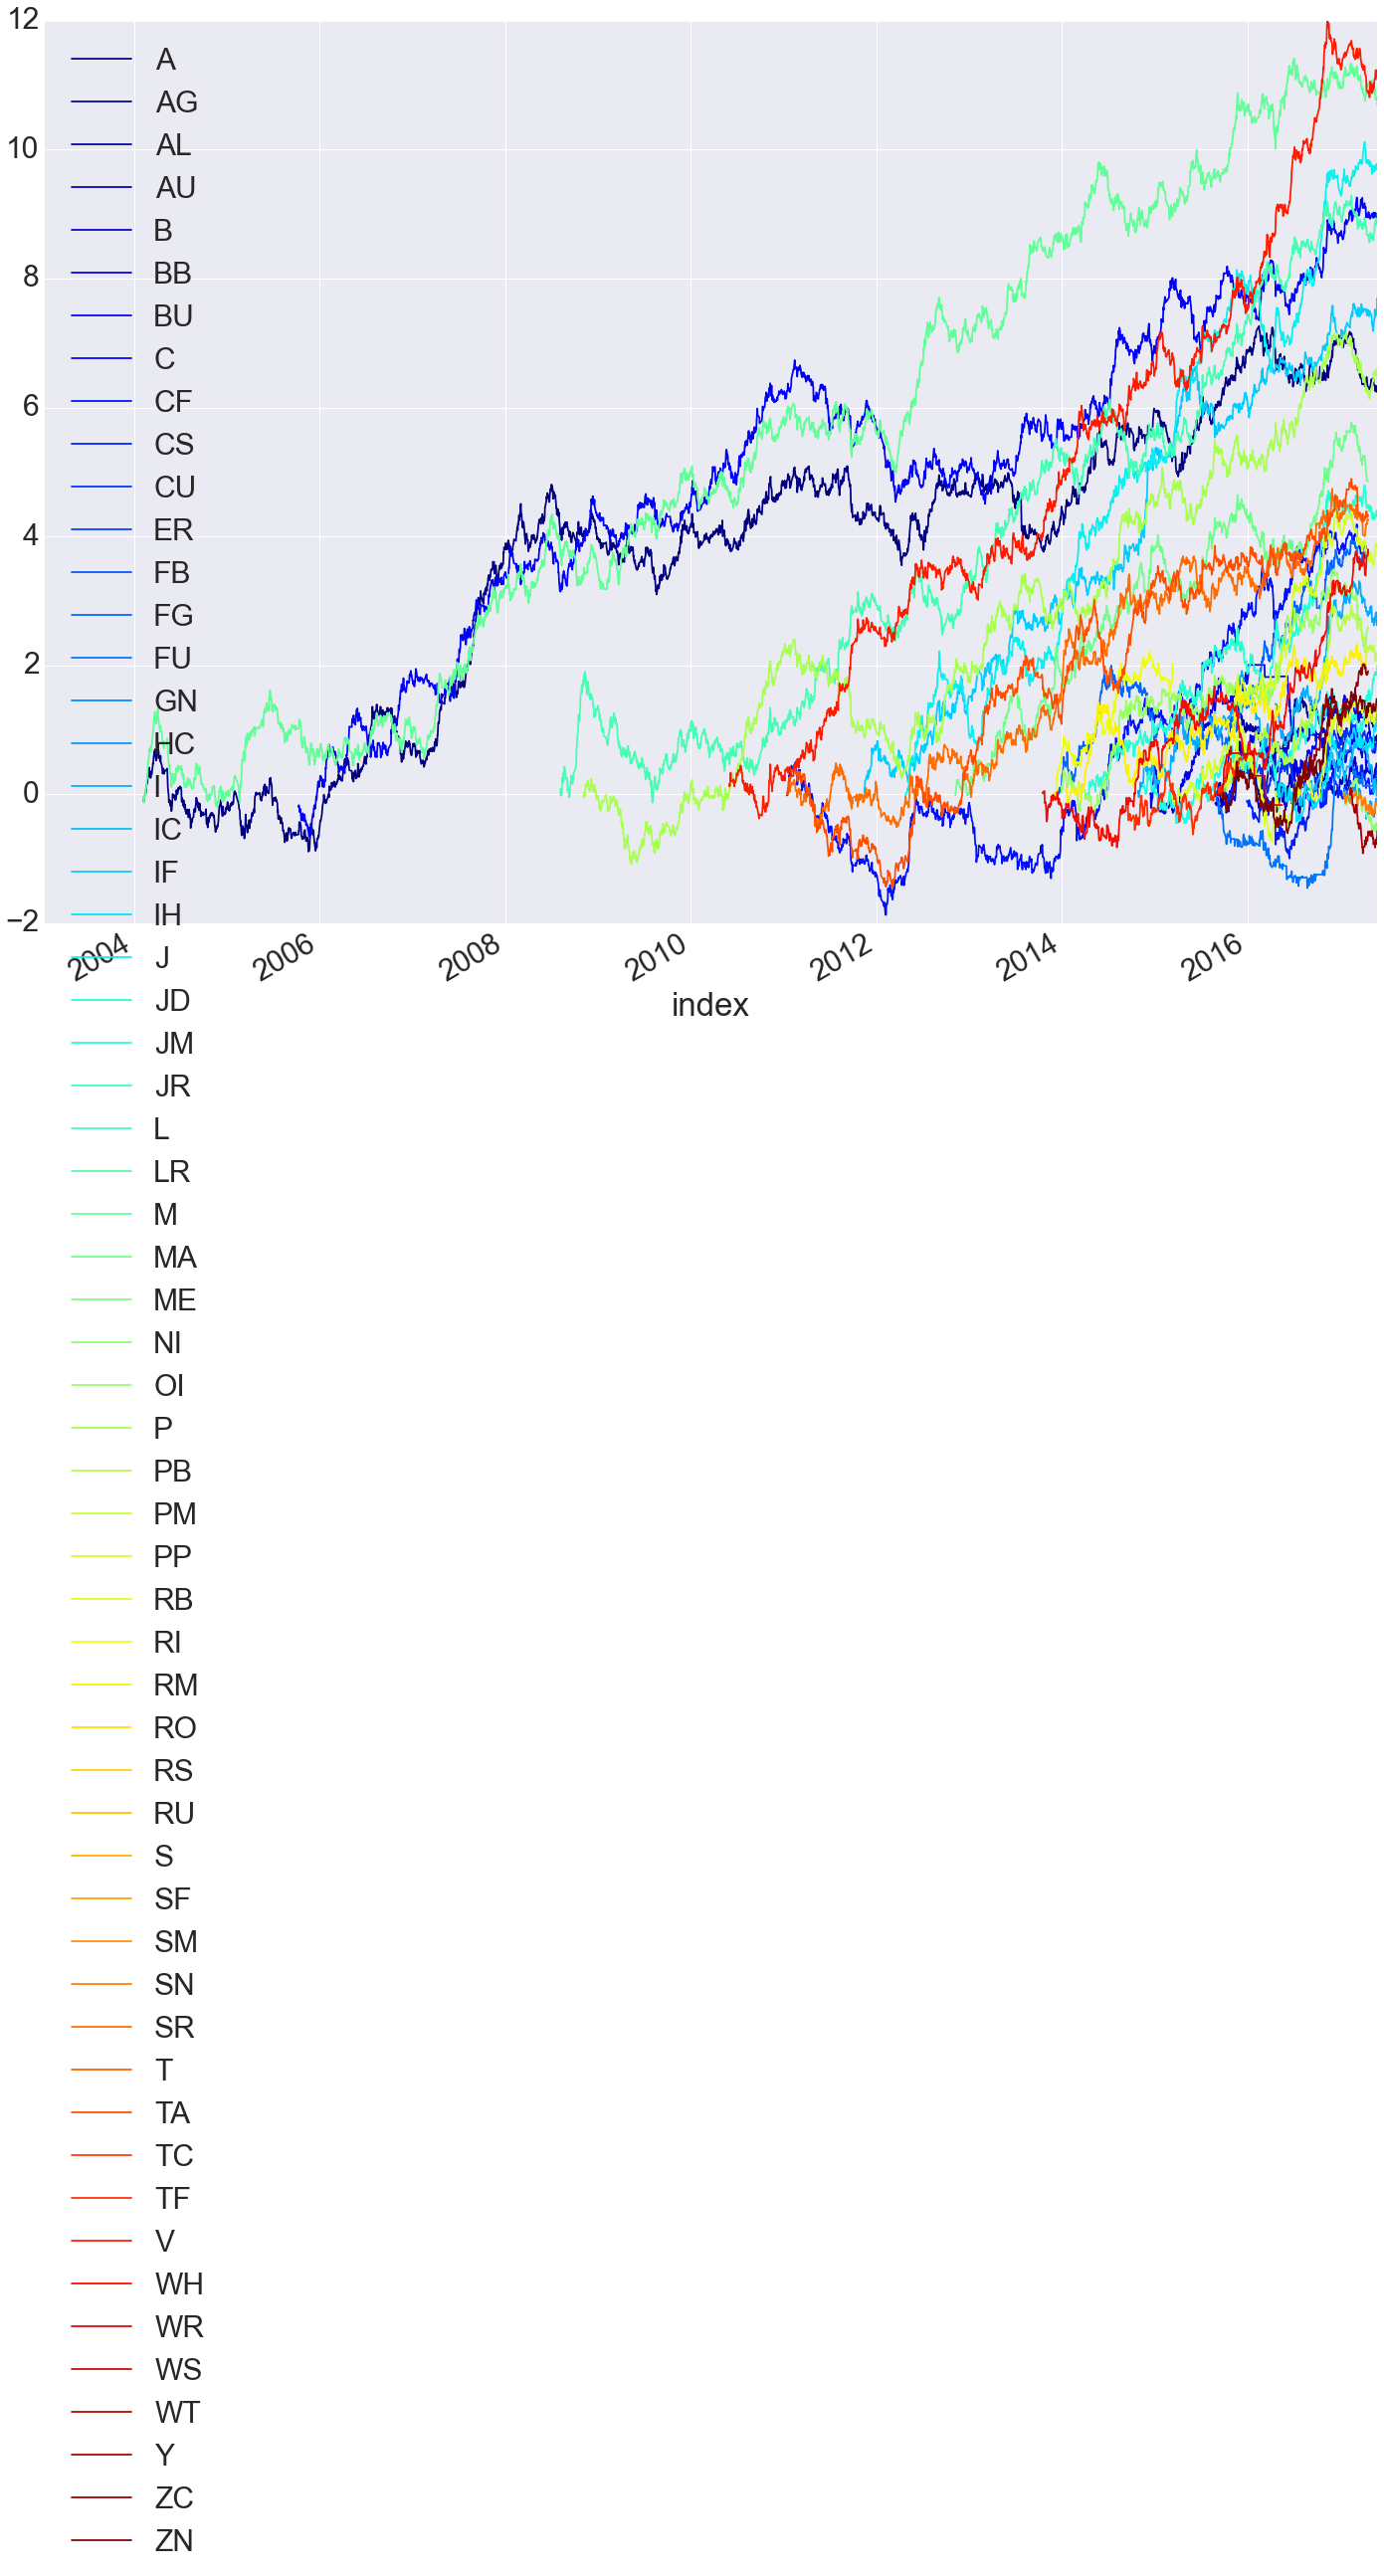

In [42]:
pos=position
pnl=calc_contract_pnl(pos,df)
sr=calc_Sharpe(pnl)
pnl.cumsum().plot(colormap='jet')

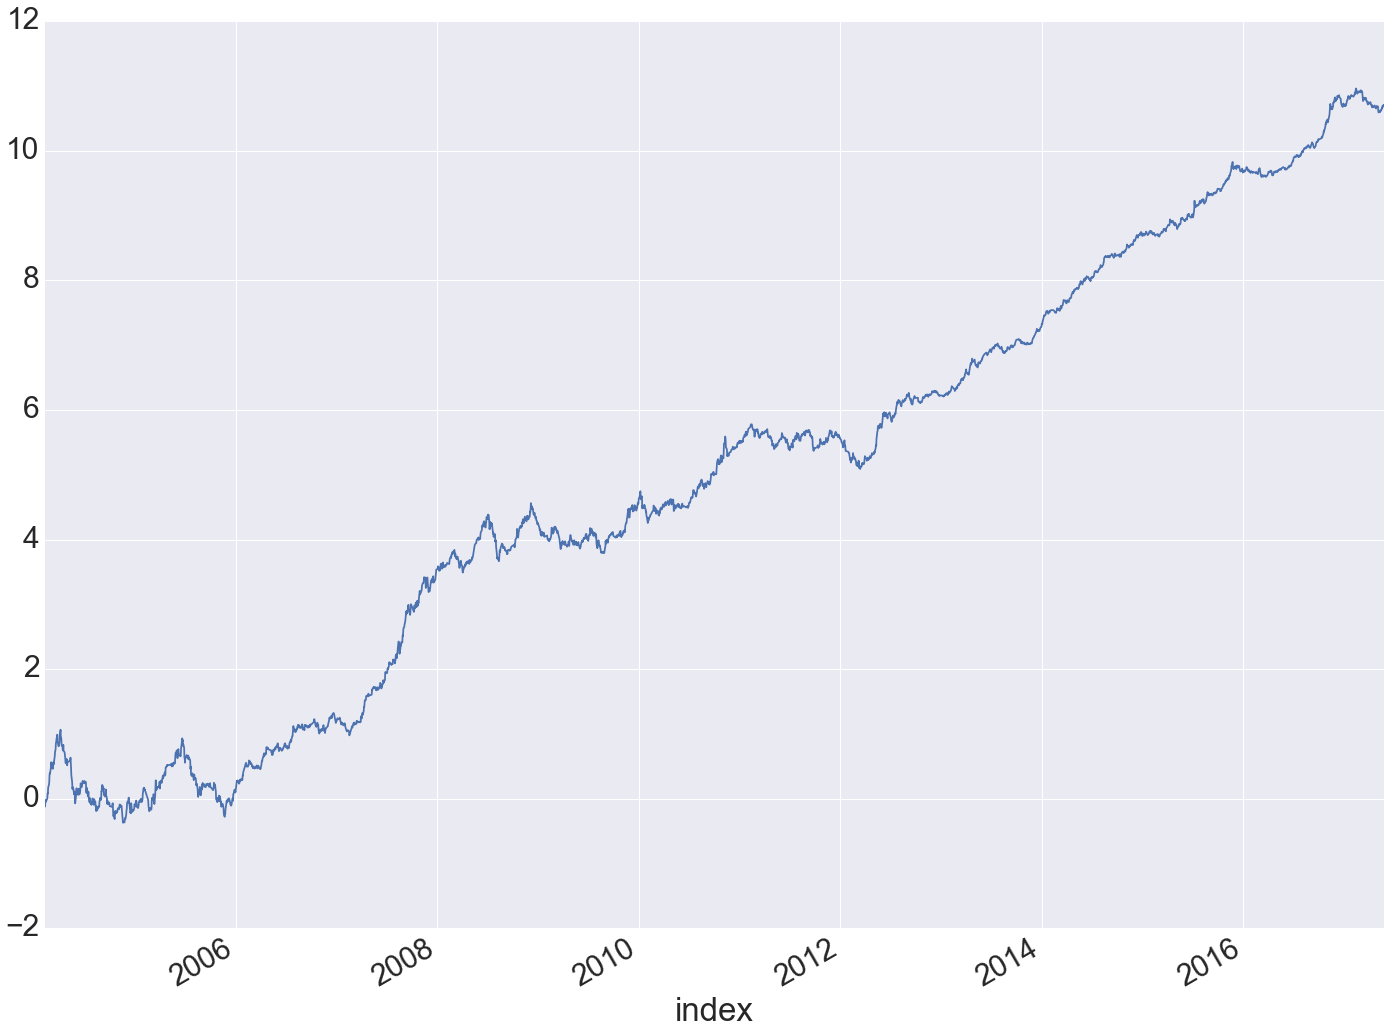

In [49]:
ew_portfolio_pnl(pnl).cumsum().plot()

0.5756129627904346

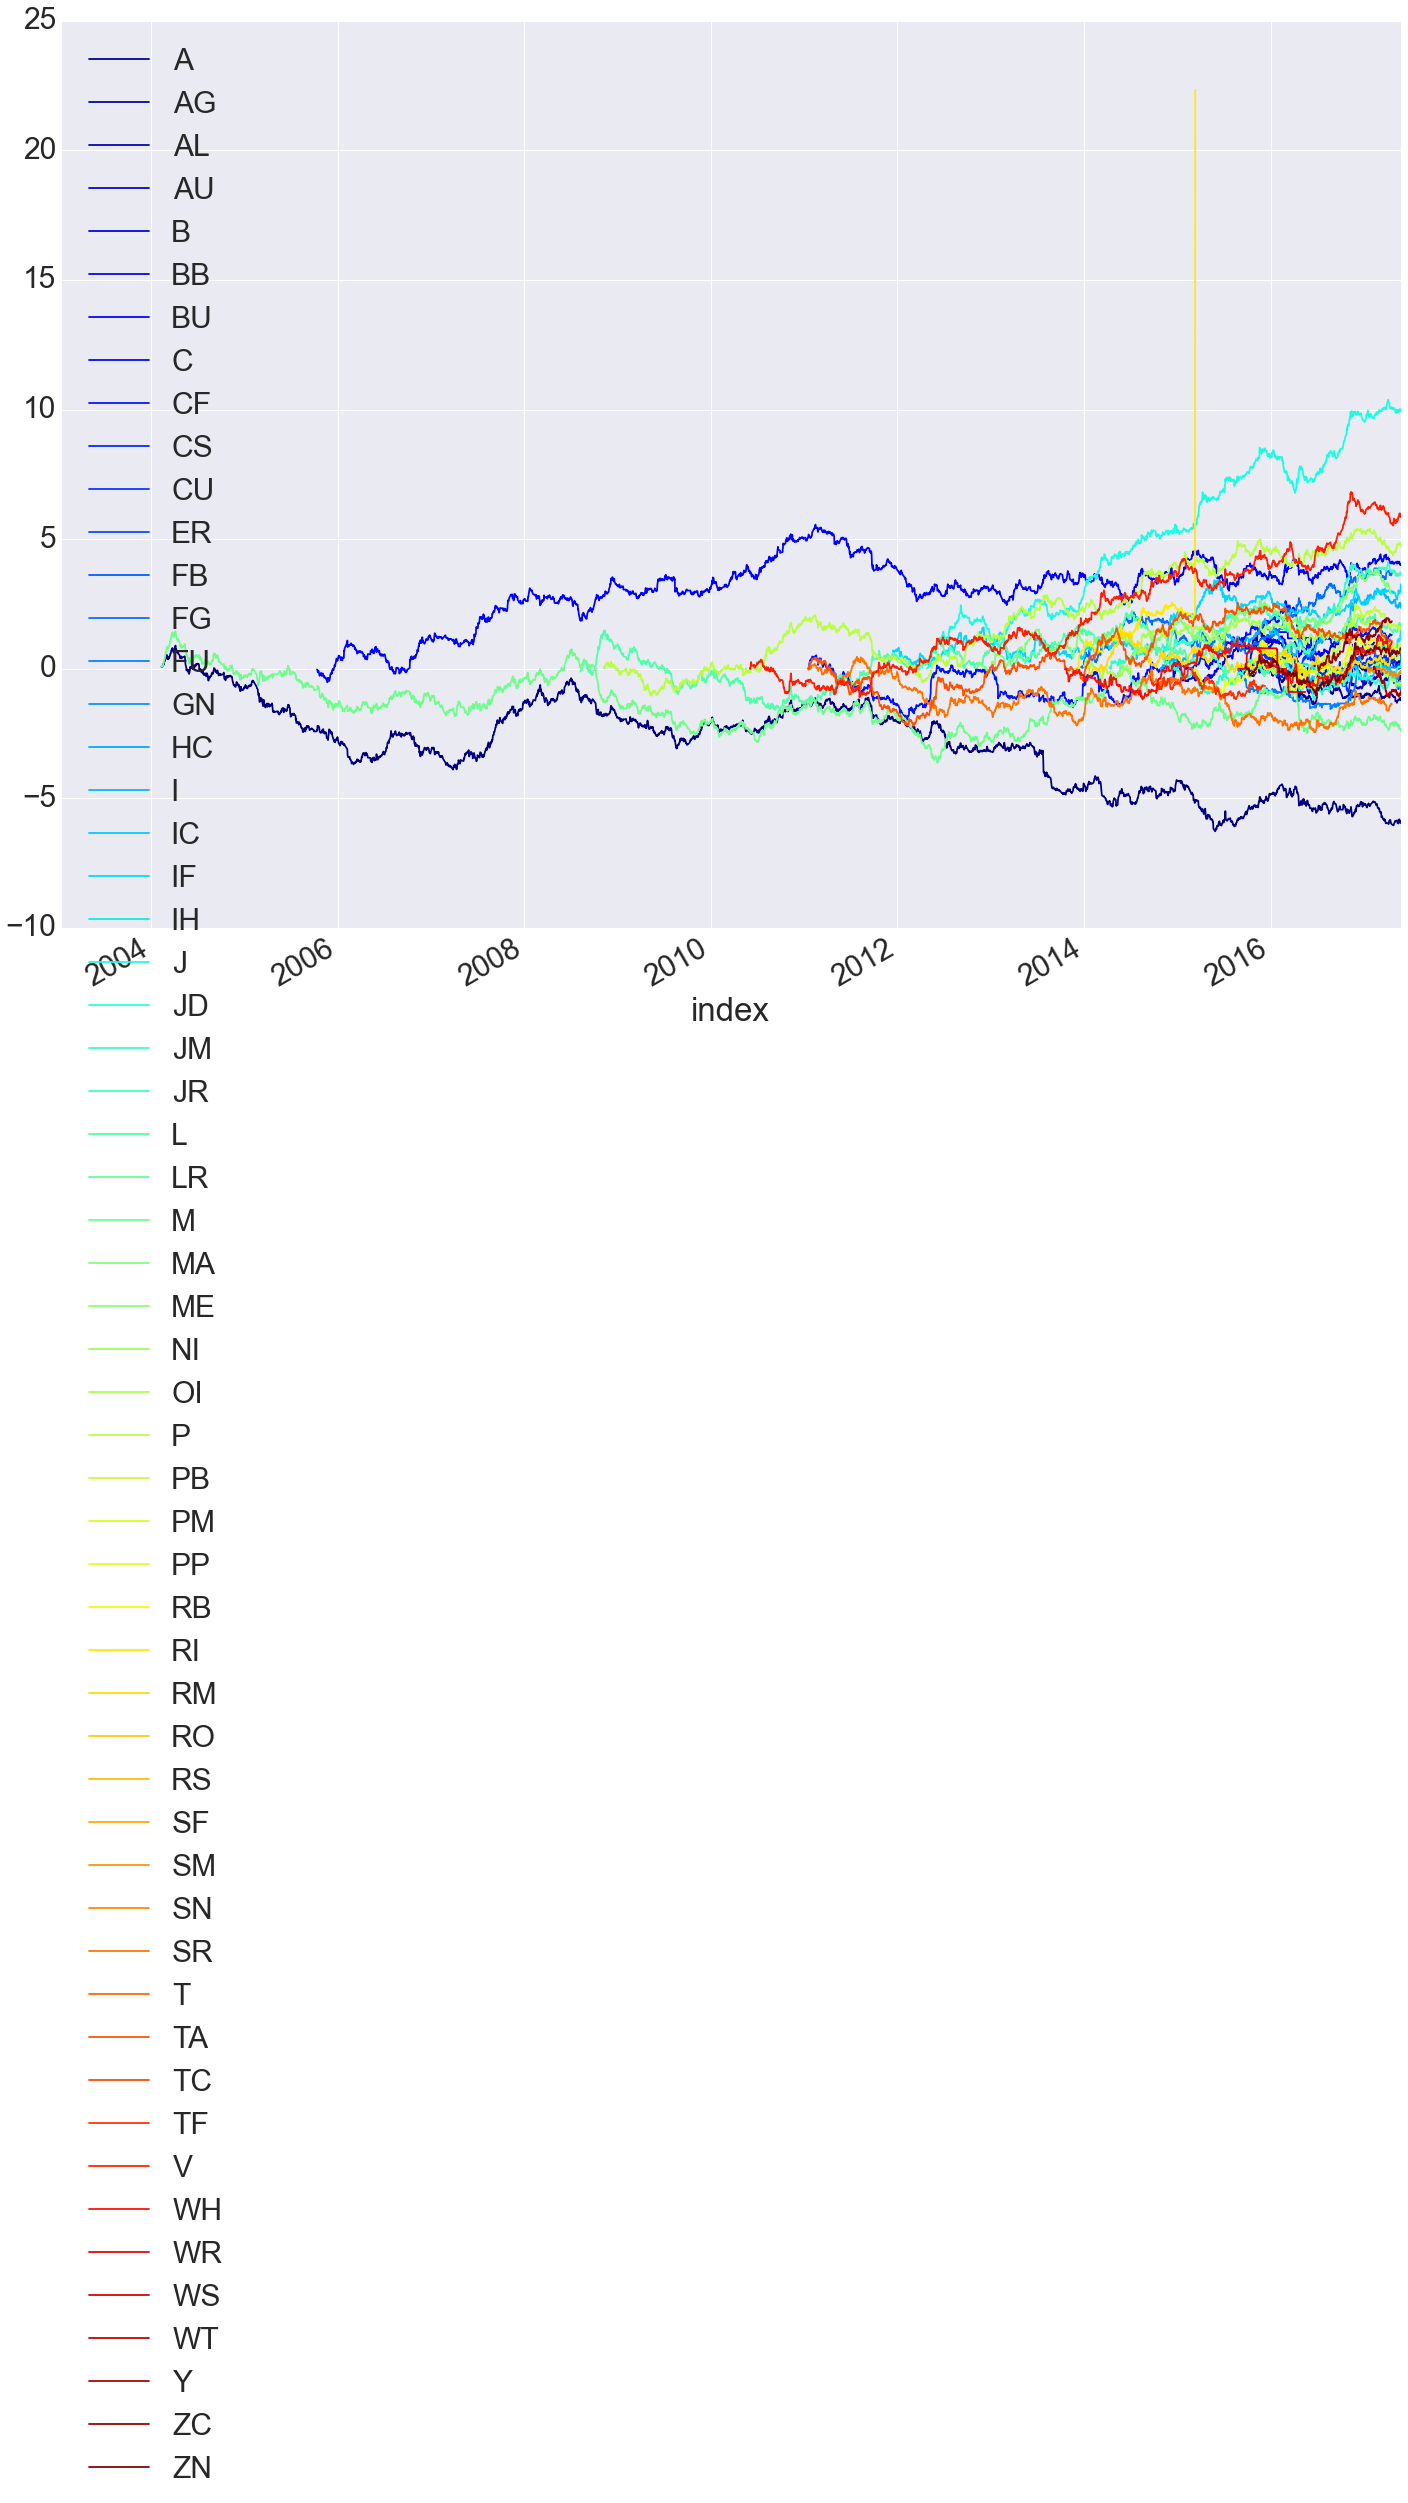

In [51]:
pos=tsmom_daily(df,250)
pnl=calc_pnl(pos,df)
sr=calc_Sharpe(pnl)
pnl.cumsum().plot(colormap='jet')

# Debugging trading model

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: FutureWarning: pd.ewm_std is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).std(bias=False)


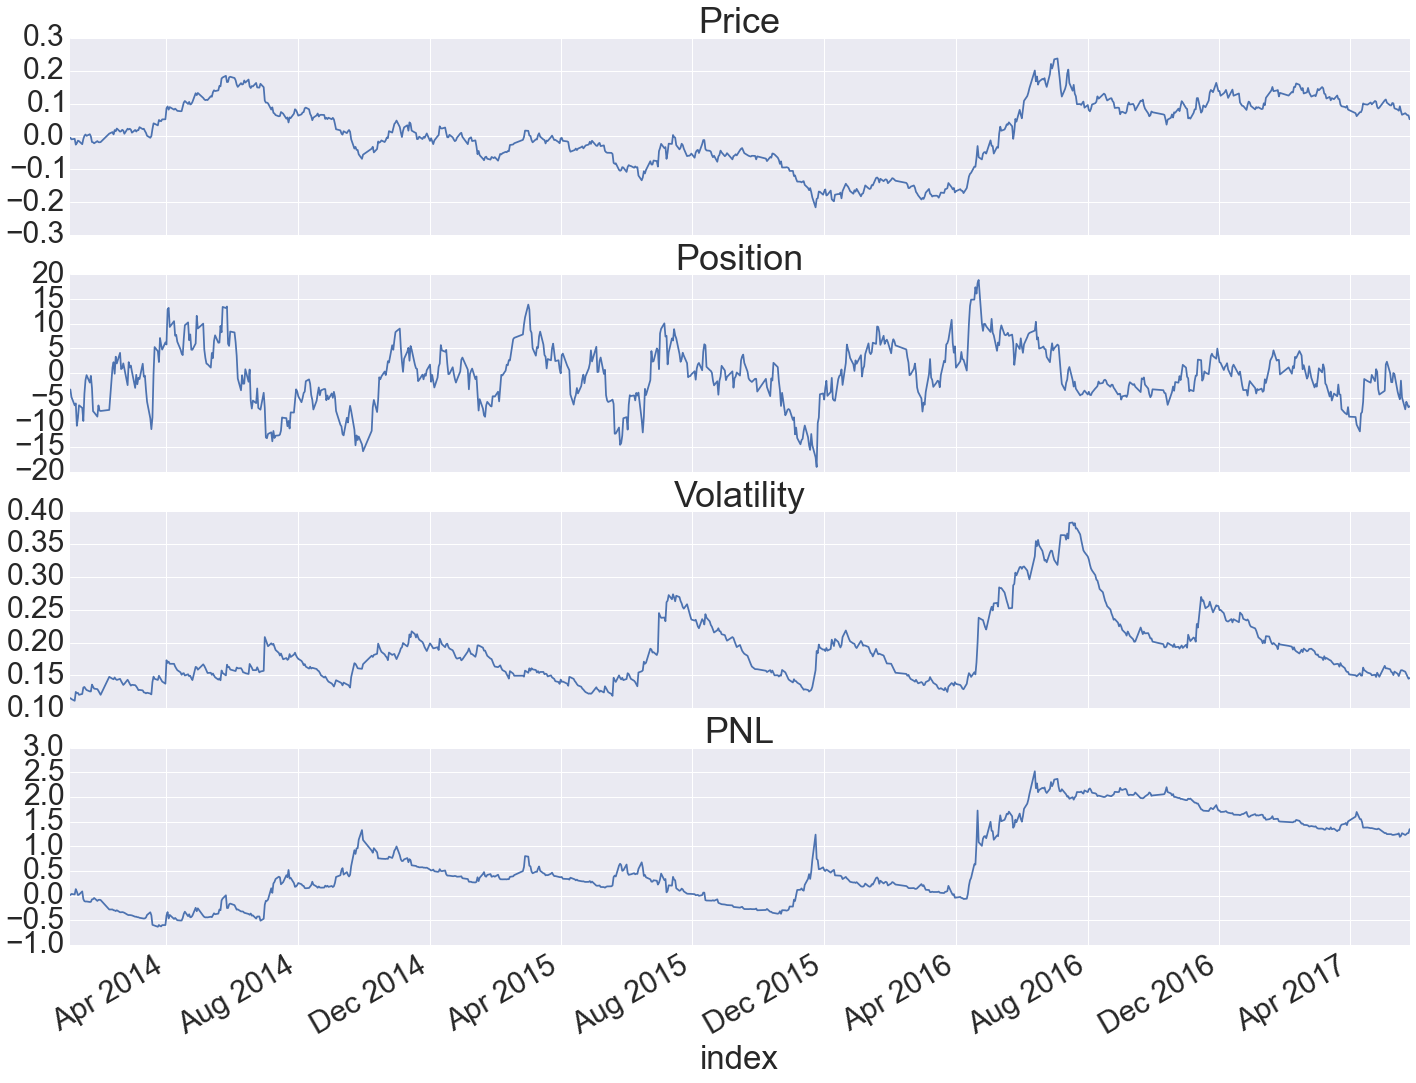

In [52]:
pos=tsmom_daily(df,20)
pos=ewma_mom_daily(df,20,60)
pnl=calc_pnl_wc(pos,df)
diag=pd.DataFrame()
m='M'
diag['Pos']=pos[m].dropna()
diag['Price']=df[m].dropna()
diag['PNL']=pnl[m].dropna()
diag['Vol']=pd.ewmstd(df[m],20)*16
diag=diag['2014':]
fig,axs=plt.subplots(4,1,sharex=True)
diag.Price.cumsum().plot(ax=axs[0],title='Price')
diag.Pos.plot(ax=axs[1],title='Position')
diag.PNL.cumsum().plot(ax=axs[3],title='PNL')
diag.Vol.plot(ax=axs[2],title='Volatility')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=30).mean()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=90).mean()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: FutureWarning: pd.ewm_std is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).std(bias=False)


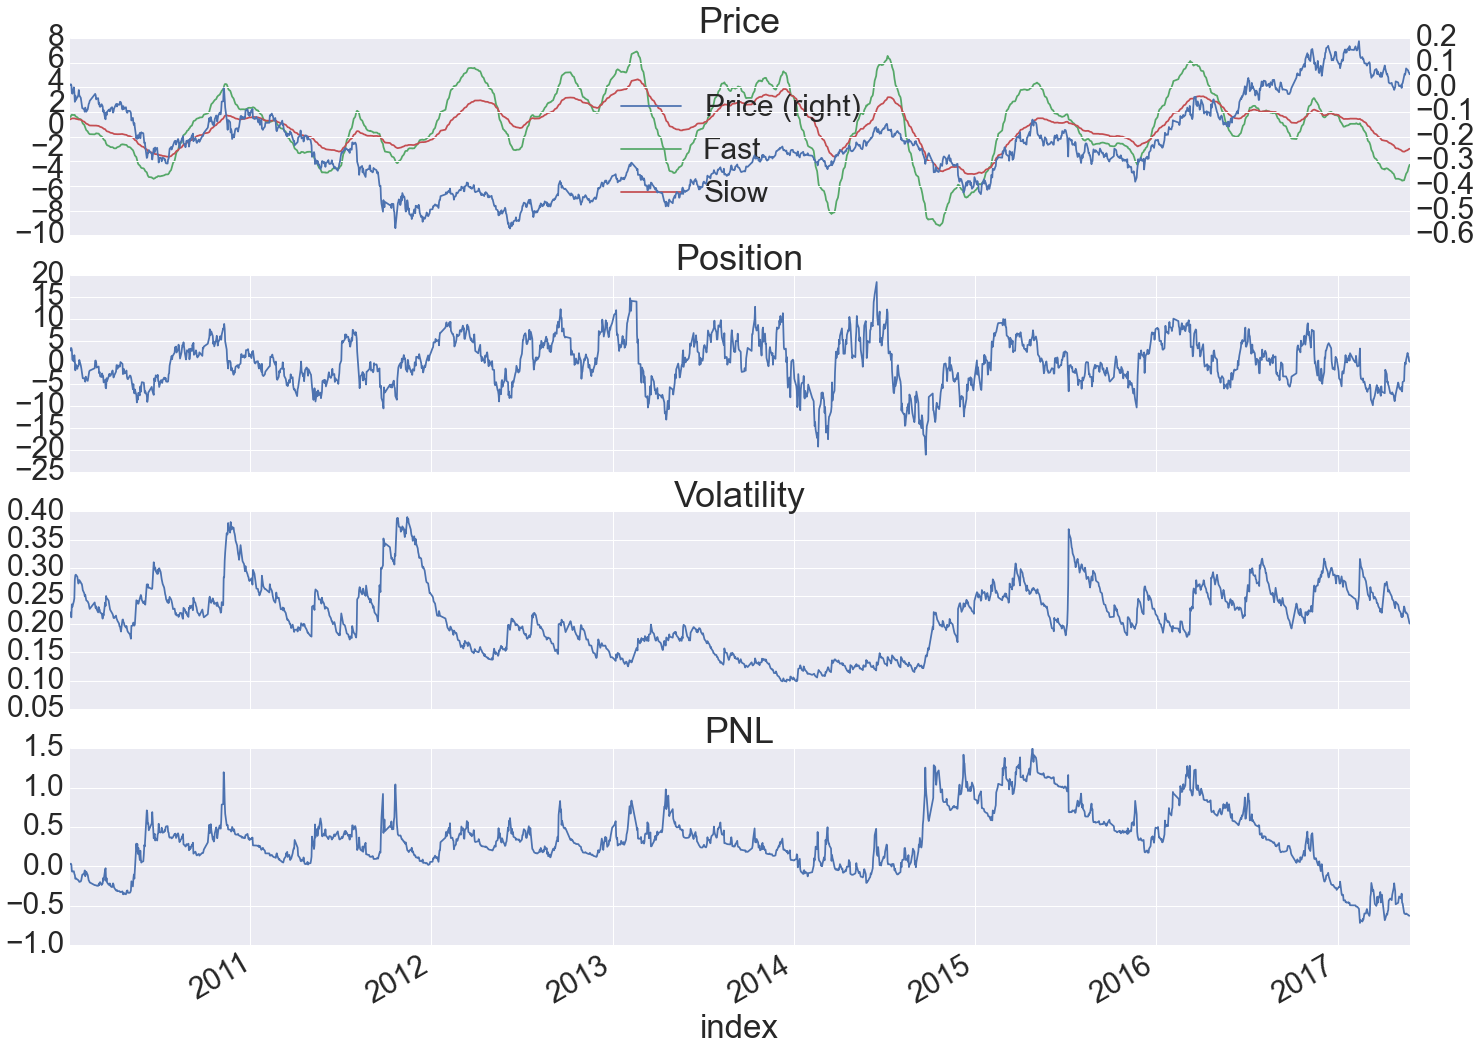

In [53]:
fast=30
slow=90
pos=ewma_mom_daily(df,fast,slow)
pnl=calc_pnl_wc(pos,df)
diag=pd.DataFrame()
m='L'
diag['Pos']=pos[m].dropna()
diag['Fast']=pd.ewma(pos[m],fast).dropna()
diag['Slow']=pd.ewma(pos[m],slow).dropna()
diag['Raw']=diag.Fast-diag.Slow
diag['Price']=df[m].dropna()
diag['PNL']=pnl[m].dropna()
diag['Vol']=pd.ewmstd(df[m],20)*16
diag=diag['2010':]
diag['Price']=diag.Price.cumsum()
fig,axs=plt.subplots(4,1,sharex=True)
diag[['Price','Fast','Slow']].plot(ax=axs[0],title='Price',secondary_y='Price')
diag.Pos.plot(ax=axs[1],title='Position')
diag.PNL.cumsum().plot(ax=axs[3],title='PNL')
diag.Vol.plot(ax=axs[2],title='Volatility')

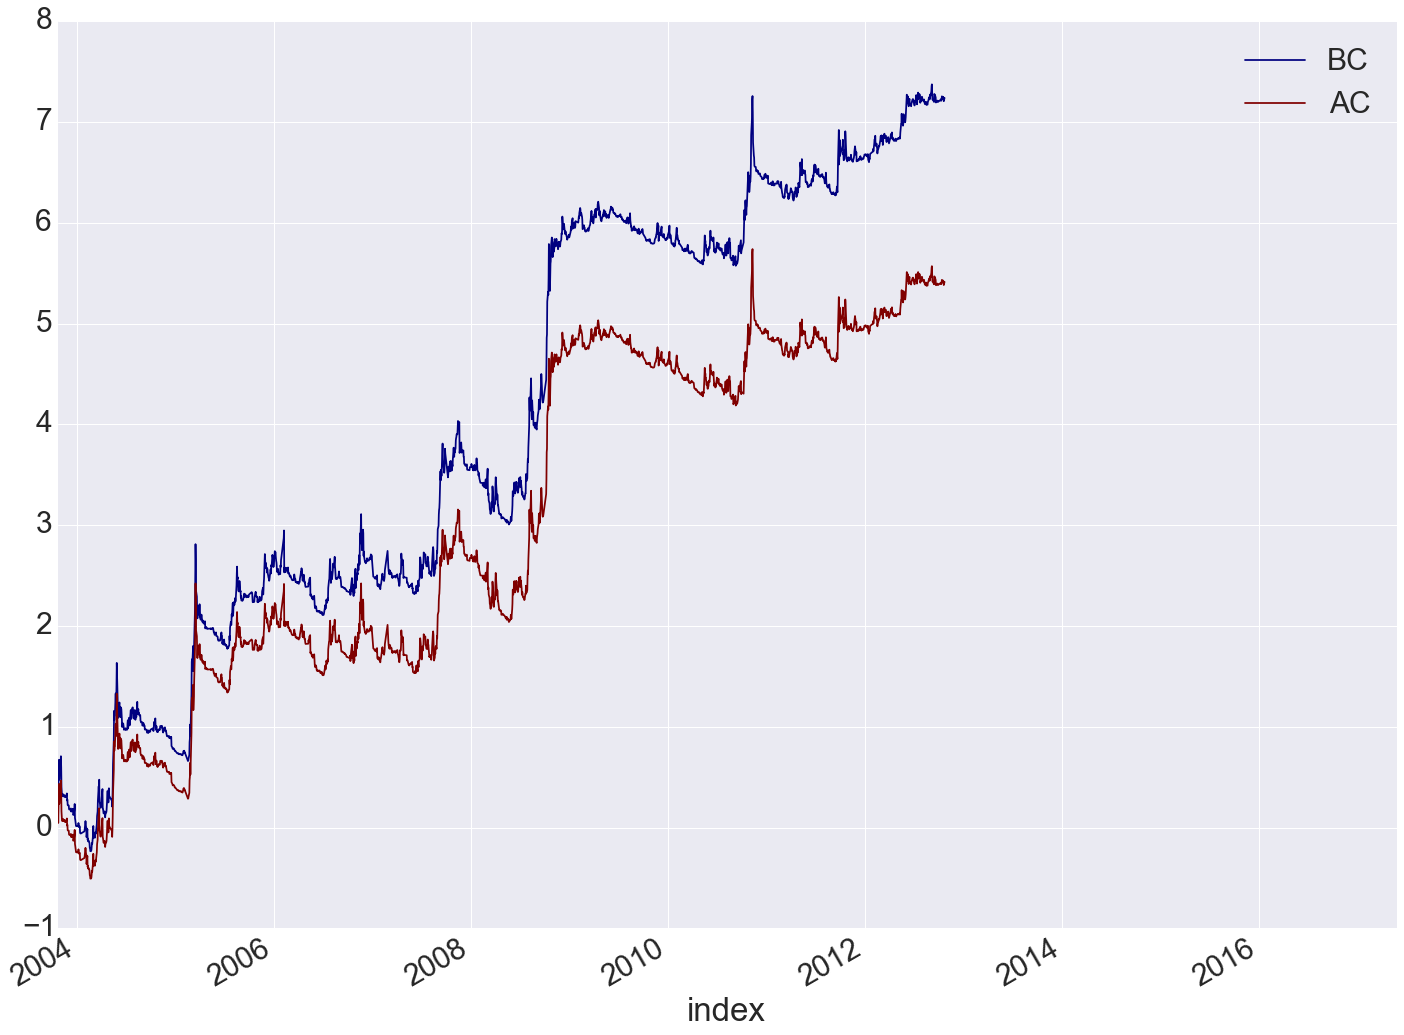

In [54]:
fast=30
slow=90
pos=ewma_mom_daily(df,fast,slow)
rtn=pd.DataFrame()
pnl_bc=calc_pnl(pos,df)
rtn['BC']=ew_portfolio_pnl(pnl_bc)
pnl_ac=calc_pnl_wc(pos,df,fee=.0005)
rtn['AC']=ew_portfolio_pnl(pnl_ac)
rtn.cumsum().plot(colormap='jet')

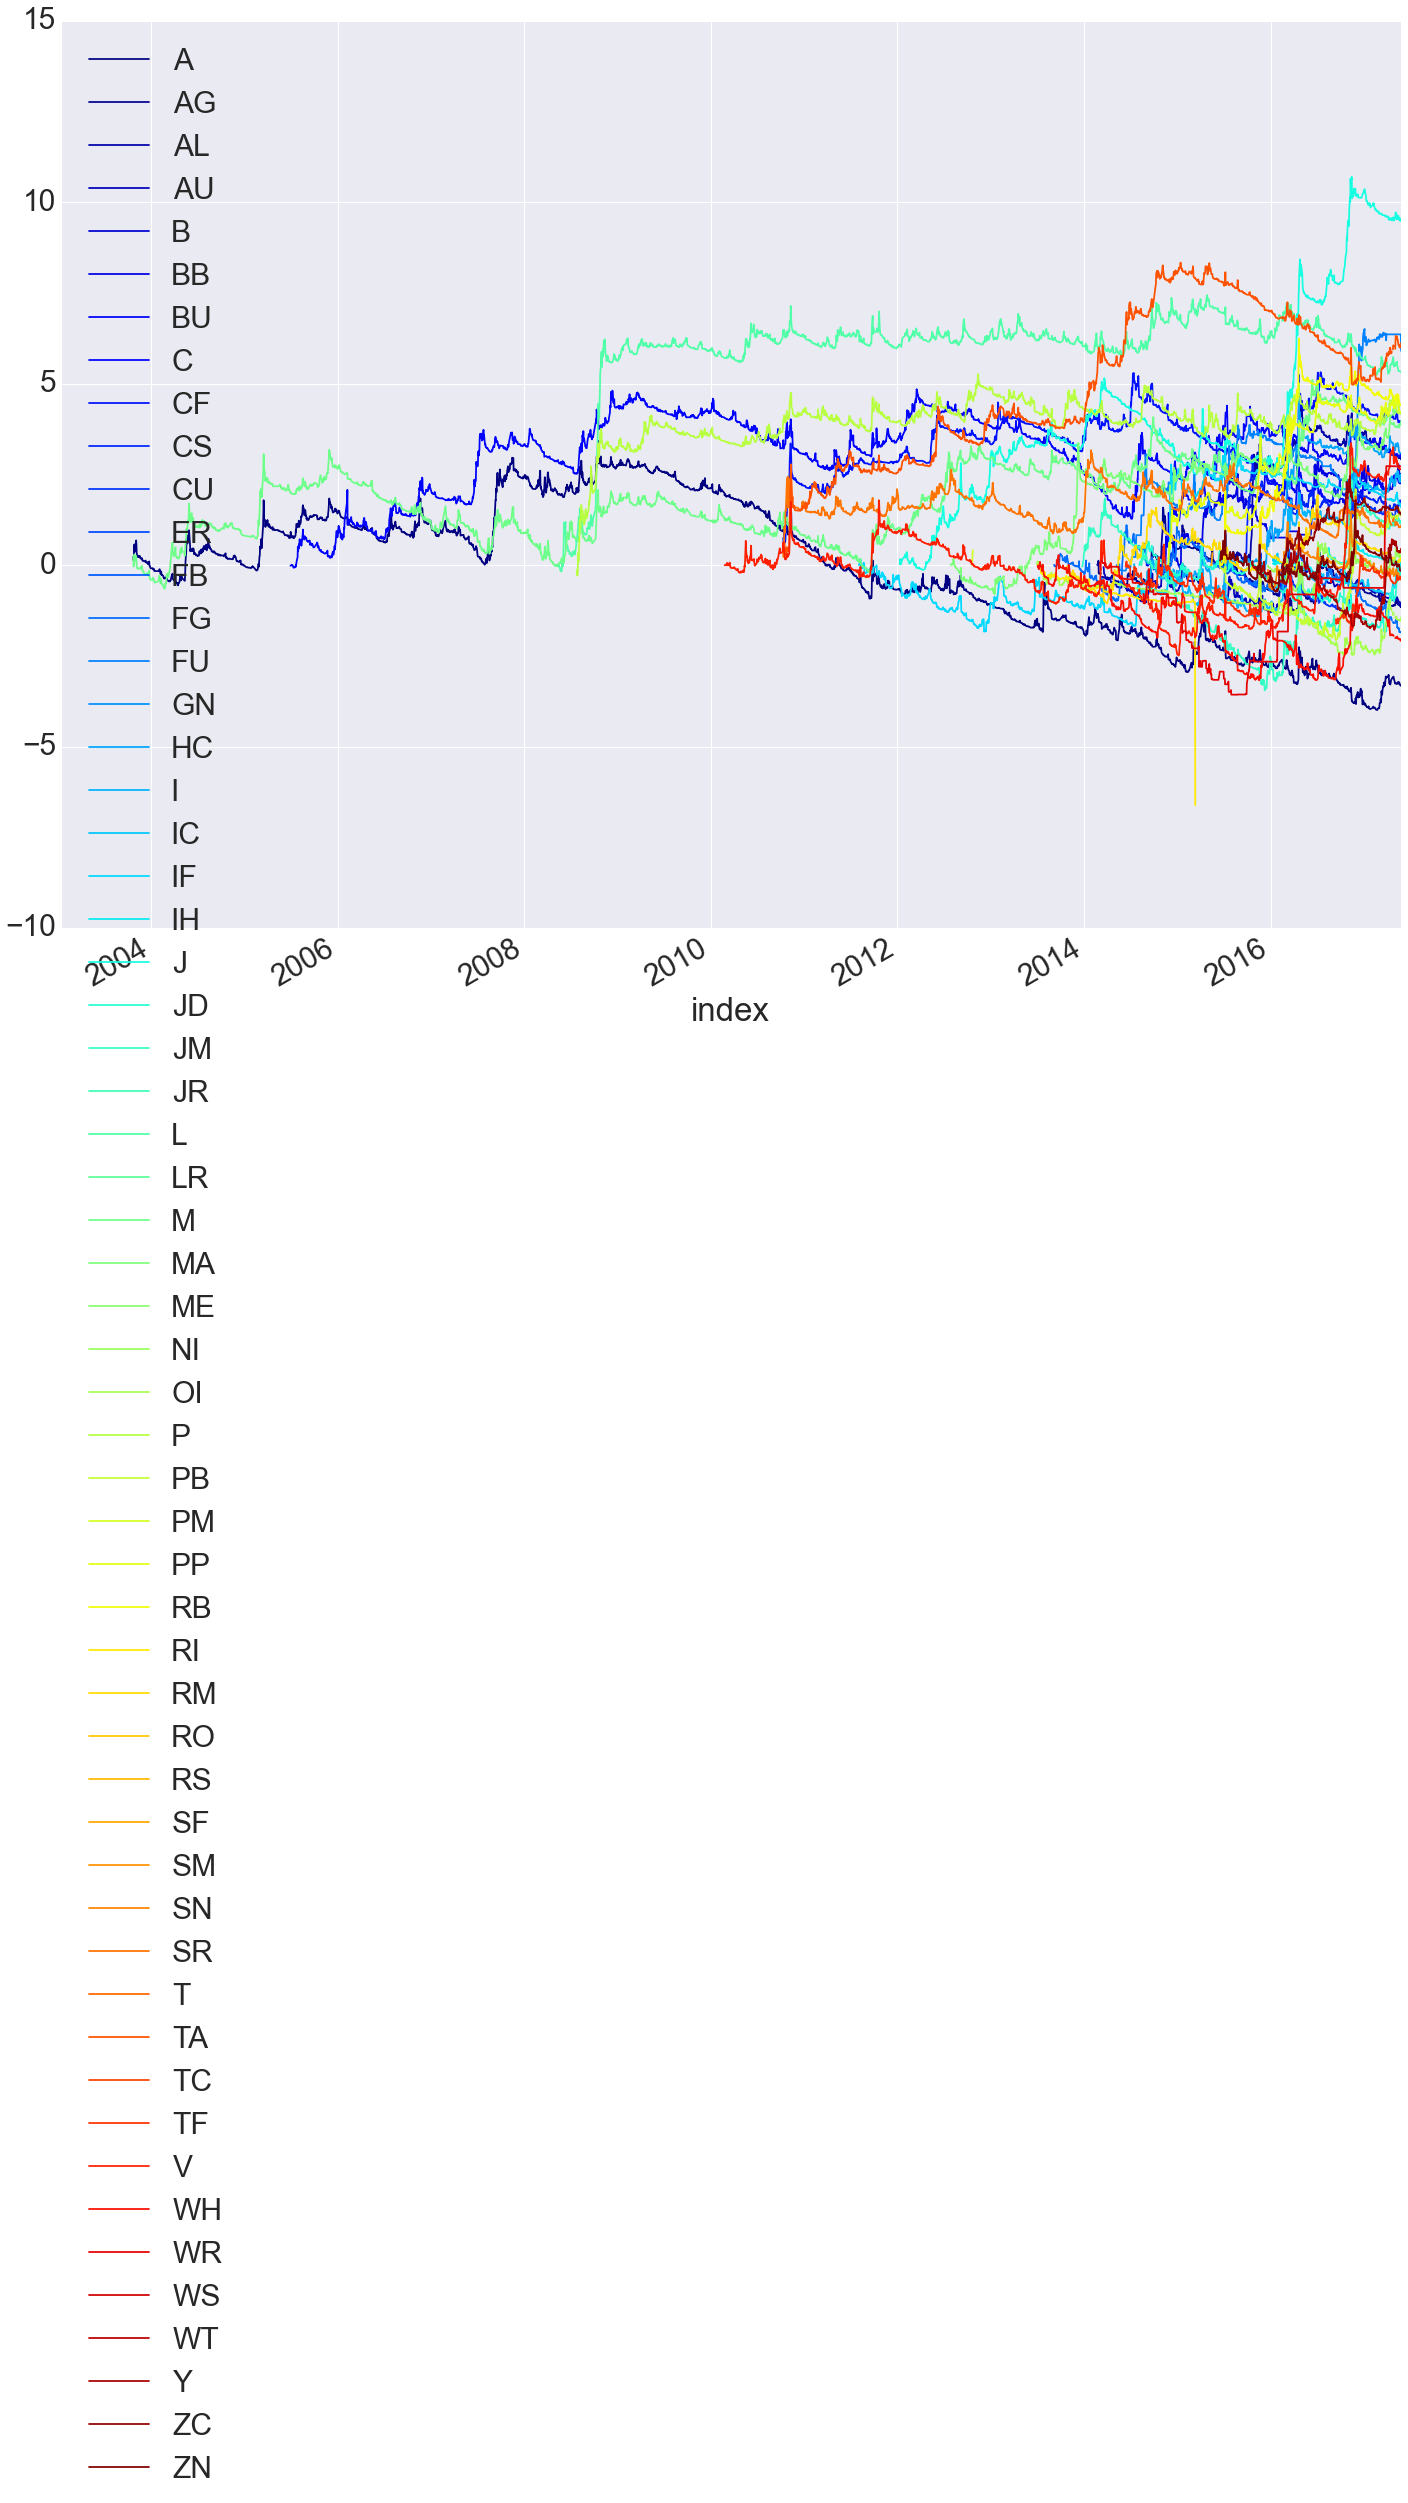

In [55]:
pnl.cumsum().plot(colormap='jet')